<center><font style="font-size:16pt; font-weight: bold">
Time and Space Transformations
</font>
</center>

<center><font style="font-size:16pt">
Wednesday, May 22nd, 9:05-9:55 and 10:05-10:55 Mountain Time
</font>
</center>

# 1. Overview

Target audience: Students with limited experience with

* manipulation and transformation of time representations and
* transforming data between Heliophysics coordinate frames

Examples are given using native Python libraries and PyHC packages.

The objective of this session is for students to
* learn about different ways to approach common Heliophysics time and coordinate system-related problems and
* try problems, ask questions, and hear answers and opinions from more advanced PyHC developers.

# 2. Outline

This is a self-guided working session. Students should read the introductory notes, attempt problems, and ask questions.

1. Students work in groups on problems of their choosing. Students are welcome to create their own problems and attempt to answer them. Instructors will circulate and answer questions (30 min).
2. Wrap-up - Instructor comments on common questions and asks selected groups to present their solution by screen sharing in Zoom. There will also be an opportunity to compare student approaches (25 min). You can use an installed package (use `!pip list` to see available packages). To install a package, you can use `!pip install PACKAGE` in your Jupyter Notebook.

# 3. Time

_9:05-9:55 Mountain Time_

Most PyHC packages use, in some way, one or more of `datetime`, Pandas, or NumPy for time representations. Some packages extend the functionality `datetime` and NumPy, for example SpacePy's `TickTock` and AstroPy's `Time` (also used by SunPy).

## 3.1 Parsing

### 3.1.1 Known Time String Format

The most common task is to parse an [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) time string into a Python `datetime` object. (`datetime` can also parse non--ISO 8601 time strings).

If you know the format of the time string and it has millisecond precision or less, a reliable approach it to use [`datetime.strptime`](https://docs.python.org/3/library/datetime.html). For example,


In [18]:
import datetime 
dt = datetime.datetime.strptime("2008-09-03T20:56:35.450686Z", "%Y-%m-%dT%H:%M:%S.%fZ")
print(dt)

2008-09-03 20:56:35.450686


In [2]:
dt = datetime.datetime.strptime("2008-09-03T20:56:35.450Z", "%Y-%m-%dT%H:%M:%S.%fZ")
print(dt)

2008-09-03 20:56:35.450000


In [3]:
dt = datetime.datetime.strptime("2008-09-03T20:56:35Z", "%Y-%m-%dT%H:%M:%SZ")
print(dt)

2008-09-03 20:56:35


In [4]:
dt = datetime.datetime.strptime("2008-09-03T20:56:35.Z", "%Y-%m-%dT%H:%M:%S.Z")
print(dt)

2008-09-03 20:56:35


In [21]:
dt = datetime.datetime.strptime("2008-002T20:56:35.450686Z", "%Y-%jT%H:%M:%S.%fZ")
print(dt)

2008-01-02 20:56:35.450686


For precisions higher than a millisecond, [NumPy's datetime64](https://numpy.org/doc/stable/reference/arrays.datetime.html) can be used.

**<span style="background-color:yellow">Problems</span>**

1. Write a program that uses the output of

   ```
   datetime.datetime.strptime("2008-002T20:56:35.450686Z", "%Y-%jT%H:%M:%S.%fZ")
   ```

   and prints `01/02/2008 at 20:56:35.450686`. (You will need to refer to the [`datetime`](https://docs.python.org/3/library/datetime.html) documentation.) You program should work for any time string that has the form of the given string.

2. Repeat the previous problem without using `datetime`.

### 3.1.2 Unknown Time String Format

(This section is advanced and may be skipped.)

[ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) is a complex standard. If you have to parse a time string and don't know its format beyond "ISO 8601", you are likely to run into issues because not all packages fully implement the standard. For example, `pandas.to_datetime('2001-001T00Z')` fails.

Parsers in the PyHC community:

* [SunPy's `parse_time`](https://docs.sunpy.org/en/stable/how_to/parse_time.html)
* [AstroPy's `Time`](https://docs.astropy.org/en/stable/api/astropy.time.Time.html#astropy.time.Time)
* [SpacePy's `Ticktock`](https://spacepy.github.io/autosummary/spacepy.time.Ticktock.html)

Some code samples:

* [SpacePy's time.py](https://github.com/spacepy/spacepy/blob/main/spacepy/time.py#L1931)
* [`hapiclient`'s hapitime.py](https://github.com/hapi-server/client-python/blob/master/hapiclient/hapitime.py#L166)

References

* A comprehensive list of Python packages that deal with [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) at https://github.com/closeio/ciso8601
* https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date-and-time
* https://wiki.python.org/moin/WorkingWithTime

**<span style="background-color:yellow">Problem</span>**

Suppose you are asked to write a function that takes an input of an [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601) formatted time string and produces an output of a `datetime` object. How would you approach the problem? What tests would you use? How would you handle errors?

## 3.2 Generating

A common task is to generate a list of timestamps. The following example use

* `datetime()`
* `pandas.date_range()`
* `datetime64` values
* `spacepy.time.tickrange()`

To generate a list of 10 days.

In [41]:
from datetime import datetime, timedelta

time_str_start = '2022-02-01T00:00:00Z'
time_str_end = '2022-02-10T00:00:00Z'
time = datetime.fromisoformat(time_str_start[0:-1])
print(f'Start: {time_str_start}')
print(f'End:   {time_str_end}')

print(40*"-" + "\ndatetime.timedelta\n" + 40*"-")
delta = timedelta(days=1)
for i in range(10):
  print(time)
  time += delta
# or time = [time + delta for i in range(10)]

Start: 2022-02-01T00:00:00Z
End:   2022-02-10T00:00:00Z
----------------------------------------
datetime.timedelta
----------------------------------------
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-05 00:00:00
2022-02-06 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00


In [42]:
print(40*"-" + "\npandas.date_range\n" + 40*"-")
# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
import numpy as np
import pandas as pd
timestamp_range = pd.date_range(start=time_str_start, end=time_str_end)
for time in timestamp_range:
  #print(time.to_datetime64().astype(np.int64))
  print(time.to_pydatetime())

----------------------------------------
pandas.date_range
----------------------------------------
2022-02-01 00:00:00+00:00
2022-02-02 00:00:00+00:00
2022-02-03 00:00:00+00:00
2022-02-04 00:00:00+00:00
2022-02-05 00:00:00+00:00
2022-02-06 00:00:00+00:00
2022-02-07 00:00:00+00:00
2022-02-08 00:00:00+00:00
2022-02-09 00:00:00+00:00
2022-02-10 00:00:00+00:00


In [43]:
# https://numpy.org/doc/stable/reference/arrays.datetime.html
print(40*"-" + "\nNumPy datetime64\n" + 40*"-")
time_o = np.array('2022-02-02T00:00:00', dtype='datetime64[D]')
times = np.arange(time_o, time_o + 10, dtype='datetime64[D]')
for time in times:
  print(time)

----------------------------------------
NumPy datetime64
----------------------------------------
2022-02-02
2022-02-03
2022-02-04
2022-02-05
2022-02-06
2022-02-07
2022-02-08
2022-02-09
2022-02-10
2022-02-11


In [44]:
# https://spacepy.github.io/autosummary/spacepy.time.tickrange.html#spacepy.time.tickrange
print(40*"-" + "\nspacepy.time.tickrange\n" + 40*"-")
import spacepy.time
times = spacepy.time.tickrange(time_str_start, time_str_end, deltadays=1, dtype=None)
for time in times:
  print(time.UTC[0])

----------------------------------------
spacepy.time.tickrange
----------------------------------------
2022-02-01 00:00:00
2022-02-02 00:00:00
2022-02-03 00:00:00
2022-02-04 00:00:00
2022-02-05 00:00:00
2022-02-06 00:00:00
2022-02-07 00:00:00
2022-02-08 00:00:00
2022-02-09 00:00:00
2022-02-10 00:00:00


**<span style="background-color:yellow">Problem</span>**

Using any library, generate a `list` of `datetime` objects that start on `2024-01-01T00:00:00Z`, increments by one hour, and ends on a user-specified timestamp. You code should work for any user-specified end timestamp in the form `2022-02-01T00:00:00Z`. Be prepared to discuss the advantages/disadvantages of your approach. (Recall that in the SunPy tutorial, a related example was given).

## 3.3 Transforming

PyHC packages that implement time transformations include

1. [SpacePy](https://spacepy.github.io/time.html)
2. SunPy (primarily uses [AstroPy](https://docs.astropy.org/en/stable/api/astropy.time.Time.html#astropy.time.Time)); see also [2022 PyHC Summer School SunPy tutorial](
https://github.com/heliophysicsPy/summer-school/blob/main/sunpy-tutorial/part-3-coordinates.ipynb)

### 3.3.1 SpacePy

In [11]:
import spacepy.time

time_string = '2000-03-20T12:06:40Z'
# Basic usage
time =  spacepy.time.Ticktock(time_string, 'ISO')
print(time)

Ticktock( ['2000-03-20T12:06:40Z'], dtype=ISO)


In [12]:
# Print time_string in different systems available in SpacePy.
# SpacePy refers to the following as "systems". AstroPy has some as "formats" and
# others as "scales".
systems = ['CDF', 'ISO', 'UTC', 'TAI', 'GPS', 'UNX', 'JD', 'MJD', 'RDT', 'GPS', 'APT']
print(f"\nTime: {time_string}\n")
print(f"System   Value")
print(f"------------------------------------------")
for system in systems:
  print(f'{system:3s}      {time.convert(system)}')


Time: 2000-03-20T12:06:40Z

System   Value
------------------------------------------
CDF      Ticktock( [6.31207732e+13], dtype=CDF)
ISO      Ticktock( ['2000-03-20T12:06:40'], dtype=ISO)
UTC      Ticktock( [datetime.datetime(2000, 3, 20, 12, 6, 40)], dtype=UTC)
TAI      Ticktock( [1.33224523e+09], dtype=TAI)
GPS      Ticktock( [6.37589213e+08], dtype=GPS)
UNX      Ticktock( [9.53554e+08], dtype=UNX)
JD       Ticktock( [2451624.00462963], dtype=JD)
MJD      Ticktock( [51623.50462963], dtype=MJD)
RDT      Ticktock( [730199.50462963], dtype=RDT)
GPS      Ticktock( [6.37589213e+08], dtype=GPS)
APT      Ticktock( [6.37589213e+08], dtype=APT)


### 3.3.2 AstroPy

See also https://docs.astropy.org/en/stable/time/index.html#id6 and the SunPy tutorial from Monday.

In [96]:
from astropy.time import Time

time_string = '2000-01-01T00:00Z'
time_string = '2000-03-20T12:06:40Z'
time_object = Time(time_string, scale='utc', precision=9)

# Julian date 2451545.0 TT (Terrestrial Time), 2000 January 1 noon TT, 2000 January 1 11:59:27.816 TAI, and 2000 January 1 11:58:55.816 UTC.

time_object = Time(2451545.0, scale='tt', format='jd', precision=9)
print(time_object.isot)

time_object = Time('2000-01-01T11:59:27.816', scale='tai', format='isot', precision=9)
print(time_object.tt)

time_object = Time('2000-01-01T11:58:55.816', scale='utc', format='isot', precision=9)
print(time_object.tt)

time_object.format = 'jd'
print(time_object)


2000-01-01T12:00:00.000000000
2000-01-01T12:00:00.000000000
2000-01-01T12:00:00.000000000
2451544.9992571296


In [97]:
time_string = '2000-03-20T12:06:40Z'
time_object = Time(time_string, precision=9)

# Print all formats and scales for t
print(f"\nTime: {time_object}\n")
maxlen = max([len(f) for f in list(Time.FORMATS.keys())])
print(f"Format        Scale Value")
print(f"------------------------------------------")
for FORMAT in [*list(Time.FORMATS.keys()),'jd1','jd2']:
  for SCALE in Time.SCALES:
    if SCALE == 'local': continue
    # Set scale. time_object = getattr(time_object, SCALE) is equivalent to
    #    time_object = time_object.SCALE
    # where SCALE is one of scales listed at
    # https://docs.astropy.org/en/stable/time/index.html#id6
    time_object = getattr(time_object, SCALE)

    # Set format. getattr(t, FORMAT) is equivalent to doing
    #    t = Time(time_string)
    #    val = t.format
    # where FORMAT is one of the formats listed at
    # https://docs.astropy.org/en/stable/time/#time-format
    val = getattr(time_object, FORMAT)

    print(f"{FORMAT:13} {SCALE:5} {val}") # https://docs.astropy.org/en/stable/time/#id6


Time: 2000-03-20T12:06:40.000000000

Format        Scale Value
------------------------------------------
jd            tai   2451624.005
jd            tcb   2451624.0055039953
jd            tcg   2451624.0053784098
jd            tdb   2451624.005372518
jd            tt    2451624.0053725
jd            ut1   2451624.0046329196
jd            utc   2451624.0046296297
mjd           tai   51623.505
mjd           tcb   51623.50550399557
mjd           tcg   51623.505378409616
mjd           tdb   51623.50537251841
mjd           tt    51623.5053725
mjd           ut1   51623.50463291946
mjd           utc   51623.50462962963
decimalyear   tai   2000.2172267759563
decimalyear   tcb   2000.2172281529934
decimalyear   tcg   2000.2172278098624
decimalyear   tdb   2000.2172277937661
decimalyear   tt    2000.217227793716
decimalyear   ut1   2000.217225773004
decimalyear   utc   2000.2172257640154
unix          tai   953554000.0
unix          tcb   953554000.0
unix          tcg   953554000.0
unix     

**<span style="background-color:yellow">Problems</span>**

Use AstroPy and/or SpacePy to test the claim that epoch J2000.0, defined as 2000 January 1 noon Terrestrial Time, corresponds to Julian date 2451545.0 Terrestrial Time, 2000 January 1 11:59:27.816 TAI, and 2000 January 1 11:58:55.816 UTC.

## 3.4 Plotting

The default tick labels dates and time for Matplotlib usually require manually modification. For example, consider the following

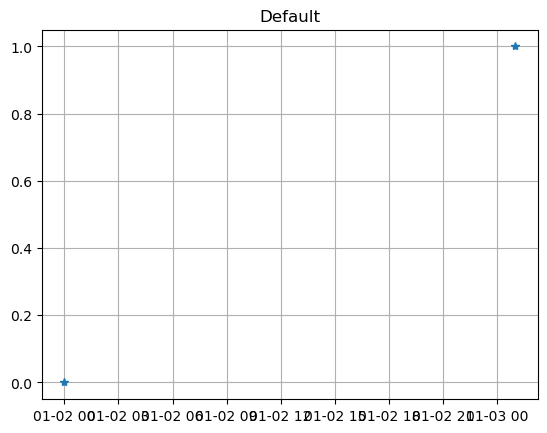

In [26]:
import matplotlib.pyplot as plt
import datetime

dt1 = datetime.datetime(2011, 1, 2)
dt2 = dt1 + datetime.timedelta(days=1, hours=1, minutes=1)
x = [dt1, dt2]
y = [0.0,1.0]

plt.plot(x, y,'*')
plt.title('Default')
plt.grid()

In this tutorial, we provide examples of code that are a starting point for manually modifying tick labels.

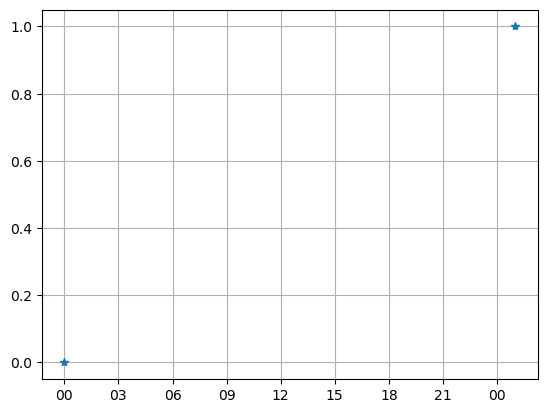

In [35]:
plt.figure()
plt.plot(x, y,'*')
plt.grid()
ax = plt.gca()

# A locator is used to indicate the locations for the major ticks.
# In the following, we indicate that we want major ticks ever three hours.
major_locator = mpld.HourLocator(byhour=list(range(0, 24, 3)) )

# A formatter is used to format the value of the label for the major tick
# In the following, we indicate that we want only to show the hour.
major_formatter = mpld.DateFormatter('%H')

ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_major_locator(major_locator)

The following code is the same as above except we extend the range so there is a tick label after the last data point (last line of code).

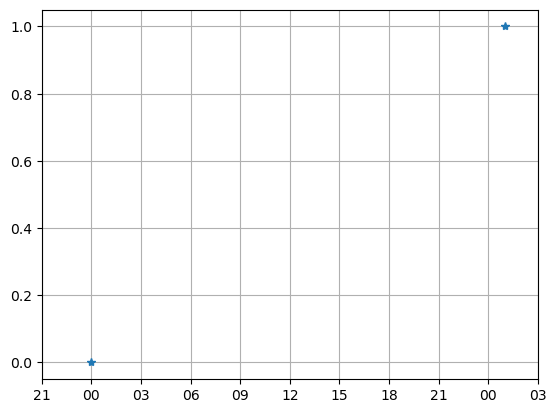

In [40]:
plt.figure()
plt.plot(x, y,'*')
plt.grid()
ax = plt.gca()

# A locator is used to indicate the locations for the major ticks.
# In the following, we indicate that we want major ticks ever three hours.
major_locator = mpld.HourLocator(byhour=list(range(0, 24, 3)) )

# A formatter is used to format the value of the label for the major tick
# In the following, we indicate that we want only to show the hour.
major_formatter = mpld.DateFormatter('%H')

ax.xaxis.set_major_formatter(major_formatter)
ax.xaxis.set_major_locator(major_locator)

# Modify the x limits
ax.set_xlim([datetime.datetime(2011, 1, 1, 21), datetime.datetime(2011, 1, 3, 3)]);

* Matplotlib time axes
* AstroPy time_support
* spacepy/plot/utils.py
* [hapiplot](https://github.com/hapi-server/plot-python/blob/main/hapiplot/plot/datetick.py)
* [pytplot](https://pypi.org/project/pytplot-mpl-temp/)
* [geospacelab](https://github.com/JouleCai/geospacelab)


# 4. Space

Three main approaches:

1. Custom library: SpacePy, SunPy, etc. More often used by scientists.
2. SPICE: Not covered; more often used by instrument teams. Should mention that there are often training opportunities with NAIF.
3. Web site, e.g.
   * [LAMBDA](https://lambda.gsfc.nasa.gov/toolbox/converters.html)
   * [TREPS](https://treps.irap.omp.eu/)
   * [Geomagnetic Coordinate Calculator](https://geomag.bgs.ac.uk/data_service/models_compass/coord_calc.html)
   * [AACGM-v2 Coordinate Transformations](https://sdnet.thayer.dartmouth.edu/aacgm/aacgm_calc.php)
   * [NOAA Magnetic Field Calculators](https://www.ngdc.noaa.gov/geomag/calculators/magcalc.shtml)
   * [Kyoto Geographic <=> Geomagnetic (IGRF)](https://wdc.kugi.kyoto-u.ac.jp/igrf/gggm/)

## Review of coordinate frame transforms

Give examples of doing transforms with at least two packages.

## Problems

1. Computing dipole tilt. Problem involving plotting over the course of a year. Discussion of interpretation.

2. Transforming a unit vector from GSE to GSM and plotting over the course of a year. Discussion of interpretation.

3. Conversion from helioprojective (100 arcsec in x, 100 arcsec in y) to heliographic (lat long) (Stonyhurst or Carrington)